In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/GlobalLandTemperaturesByState.csv')

In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [ ]:
df.shape

(109701, 5)

In [ ]:
df.isnull().sum()

dt                                  0
AverageTemperature               4452
AverageTemperatureUncertainty    4453
State                               1
Country                             1
dtype: int64

In [ ]:
df = df.dropna(how='any' ,axis=0)

In [ ]:
df.shape

(105248, 5)

In [ ]:
df.rename(columns={'dt':'Date','AverageTemperature':'avg_temp','AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)
df.head()

<ipython-input-9-ccf1cd2aa1ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'dt':'Date','AverageTemperature':'avg_temp','AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)


,Date,avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df.describe()

,avg_temp,confidence_interval_temp
count,105248.000000,105248.000000
mean,10.295965,1.191355
std,14.163250,1.246944
min,-38.808000,0.052000
25%,1.263000,0.331000
50%,12.682500,0.639000
75%,22.180000,1.609000
max,35.621000,11.631000


In [ ]:

df ['Date'] = pd. to_datetime(df[ 'Date'])
df.set_index('Date',
inplace = True)
df.index

<ipython-input-11-d40c5b864ac3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['Date'] = pd. to_datetime(df[ 'Date'])


DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '1971-03-01', '1971-04-01', '1971-05-01', '1971-06-01',
               '1971-07-01', '1971-08-01', '1971-09-01', '1971-10-01',
               '1971-11-01', '1971-12-01'],
              dtype='datetime64[ns]', name='Date', length=105248, freq=None)

In [ ]:
df.describe()

,avg_temp,confidence_interval_temp
count,105248.000000,105248.000000
mean,10.295965,1.191355
std,14.163250,1.246944
min,-38.808000,0.052000
25%,1.263000,0.331000
50%,12.682500,0.639000
75%,22.180000,1.609000
max,35.621000,11.631000


In [ ]:
df['Year']=df.index.year
df.head()

,avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [ ]:
df.describe()

,avg_temp,confidence_interval_temp,Year
count,105248.000000,105248.000000,105248.000000
mean,10.295965,1.191355,1906.995553
std,14.163250,1.246944,64.563354
min,-38.808000,0.052000,1743.000000
25%,1.263000,0.331000,1858.000000
50%,12.682500,0.639000,1910.000000
75%,22.180000,1.609000,1961.000000
max,35.621000,11.631000,2013.000000


In [ ]:
latest_df = df. loc['1980': '2013']
latest_df.head()

,avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [ ]:
latest_df[['Country', 'avg_temp']].groupby(['Country']).mean().sort_values ('avg_temp' )

,avg_temp
Country,
Canada,1.075977
Russia,2.729052
United States,11.232098
Australia,12.152389
China,14.035847
India,22.885436
Brazil,25.813831


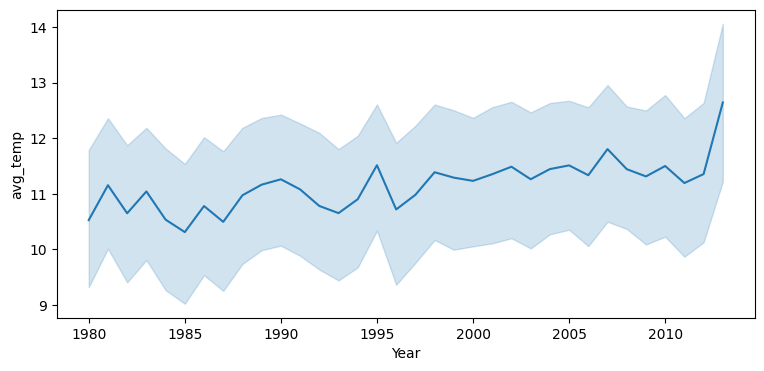

In [ ]:
plt. figure(figsize=(9, 4))
sns.lineplot(x ="Year", y = "avg_temp", data=latest_df)
plt.show()

In [ ]:
resample_df = latest_df[['avg_temp']].resample('A').mean()

In [ ]:
resample_df.head()

,avg_temp
Date,
1980-12-31,10.527619
1981-12-31,11.155385
1982-12-31,10.650502
1983-12-31,11.043397
1984-12-31,10.536044


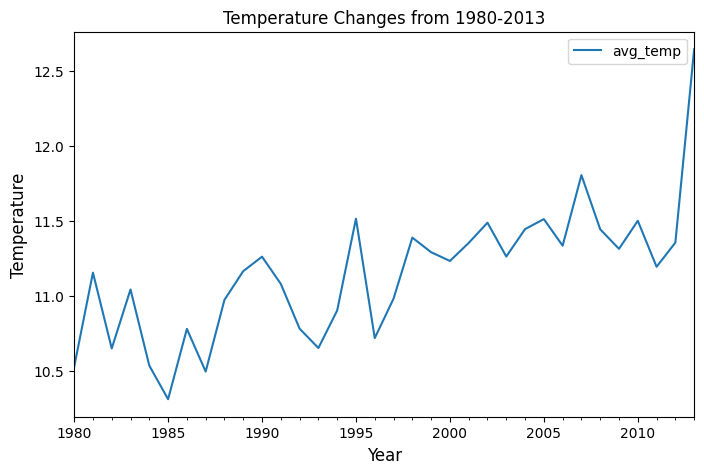

In [ ]:
resample_df.plot(title='Temperature Changes from 1980-2013' ,figsize=(8,5))
plt.ylabel( 'Temperature' ,fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [ ]:
from statsmodels.tsa.stattools import adfuller
print( 'Dickey Fuller Test Results: ')
test_df = adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(test_df[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in test_df[4].items():
  df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Results: 
Test Statistic                 -0.395416
p-value                         0.910861
Lags Used                       5.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [ ]:
decomp = seasonal_decompose(resample_df)
trend = decomp. trend
seasonal = decomp.seasonal
residual = decomp.resid

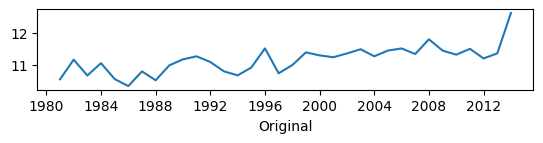

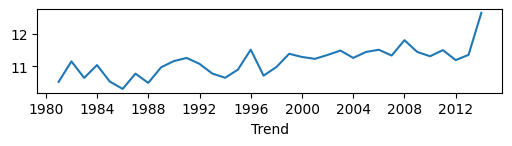

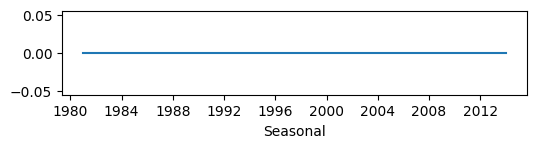

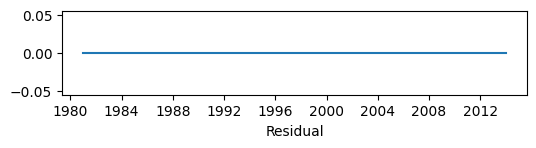

<Figure size 600x500 with 0 Axes>

In [ ]:
plt.subplot (411)
plt.plot(resample_df)
plt. xlabel('Original')
plt.figure(figsize=(6,5))
plt.subplot(412)
plt.plot (trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))
plt. subplot (413)
plt. plot(seasonal)
plt. xlabel ( 'Seasonal')
plt.figure(figsize=(6,5))
plt. subplot (414)
plt. plot(residual)
plt. xlabel ('Residual')
plt.figure(figsize=(6,5))
plt. tight_layout()

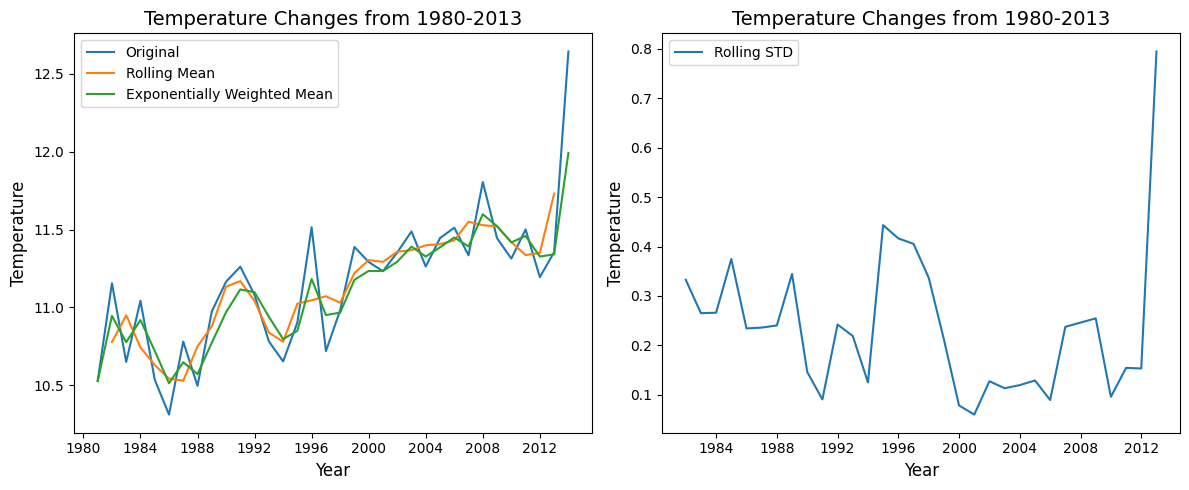

In [ ]:
rol_mean=resample_df.rolling(window=3, center=True).mean ()
ewm=resample_df. ewm(span=3).mean()
rol_std = resample_df.rolling(window=3, center=True).std()
fig, (ax1, ax2)=plt.subplots(1, 2,figsize=(12,5))
ax1. plot(resample_df,label='Original')
ax1. plot (rol_mean, label='Rolling Mean')
ax1. plot(ewm, label='Exponentially Weighted Mean' )
ax1.set_title( 'Temperature Changes from 1980-2013', fontsize=14)
ax1. set_ylabel ('Temperature',fontsize=12)
ax1.set_xlabel( 'Year' ,fontsize=12)
ax1. legend()
ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel ('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend ()
plt.tight_layout()
plt.show()

In [ ]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)
print ('Dickey-Fuller Test for the Rolling Mean:')
df_test=adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output=pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
  df_output['Critical Value (%s) '%key]=value
print (df_output)
print ('')
print ('Dickey-Fuller Test for the Exponentially Weighted Mean:')
df_test = adfuller(ewm.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used' ])
for key, value in df_test[4].items():
  df_output[ 'Critical Value (%s) '%key]=value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                 -0.429178
p-value                         0.905112
Lags Used                       3.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                 -0.044836
p-value                         0.954663
Lags Used                       4.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [ ]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,avg_temp
Date,
1981-12-31,0.377550
1982-12-31,-0.299259
1983-12-31,0.300083
1984-12-31,-0.094500
1985-12-31,-0.230784


In [ ]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.209255
1982-12-31,-0.126698
1983-12-31,0.124225
1984-12-31,-0.185384


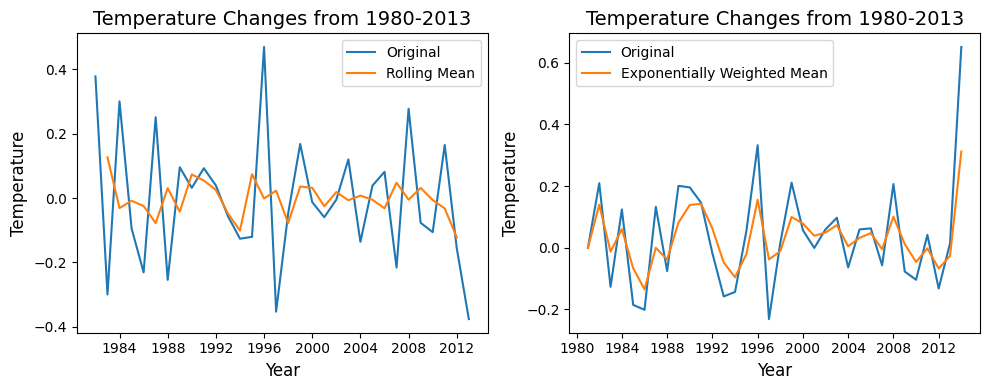

In [ ]:
df_rol_mean_diff=diff_rol_mean.rolling(window=3, center=True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(diff_rol_mean, label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title( 'Temperature Changes from 1980-2013', fontsize=14)
ax1.set_ylabel ( 'Temperature', fontsize=12)
ax1.set_xlabel('Year', fontsize=12)
ax1.legend()
ax2.plot(diff_ewm, label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title( 'Temperature Changes from 1980-2013' ,fontsize=14)
ax2.set_ylabel ('Temperature', fontsize=12)
ax2. set_xlabel('Year', fontsize=12)
ax2. legend()
plt. tight_layout()

In [ ]:
print ('Dickey-Fuller Test for the Difference between the Original and Rolling Mean: ')
dftest = adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
  dfoutput['Critical Value (%s) '%key]=value
print (dfoutput)
print ('')
print ('Dickey-Fuller Test for the Exponentially Weighted Mean:')
dftest = adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used' ])
for key, value in dftest[4].items():
  dfoutput[ 'Critical Value (%s) '%key]=value
print(dfoutput)

Dickey-Fuller Test for the Difference between the Original and Rolling Mean: 
Test Statistic                 -3.827833
p-value                         0.002635
#Lags Used                      7.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                 -3.927512
p-value                         0.001841
Lags Used                       3.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64
